### Imports

In [1]:
import pandas as pd 
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
dg=pd.read_pickle('dataset_opff_cleaned.pkl')

In [4]:
dg.shape

(108652, 25)

In [5]:
dg.columns

Index(['code', 'url', 'brands_tags', 'product_name', 'additives_n',
       'ingredients_from_palm_oil_n', 'nutriscore_grade', 'nutriscore_score',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'proteins_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'salt_100g', 'sodium_100g', 'serving_quantity', 'labels',
       'ecoscore_grade_fr', 'ecoscore_score_fr', 'energy_kcal_100g',
       'gluten_free'],
      dtype='object')

### Analyses univariées

#### Distribution par types d'aliments

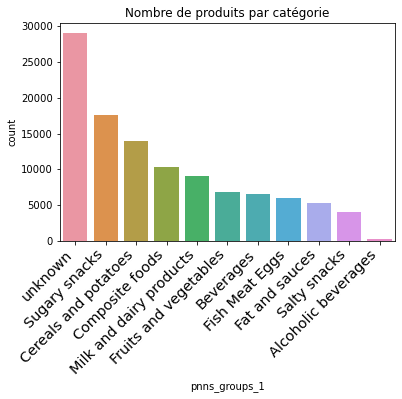

In [6]:
sns.countplot(x='pnns_groups_1',data=dg,order=dg['pnns_groups_1'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Nombre de produits par catégorie')
plt.show()

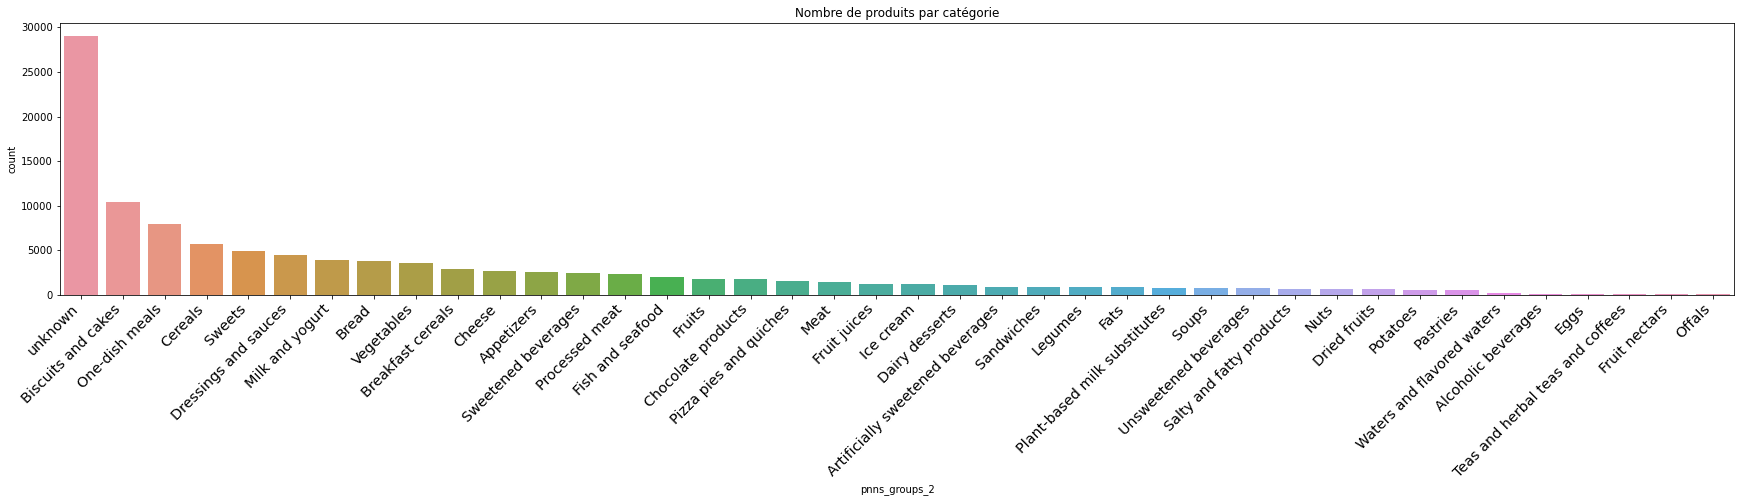

In [7]:
plt.figure(figsize=(30,5))
sns.countplot(x='pnns_groups_2',data=dg,order=dg['pnns_groups_2'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Nombre de produits par catégorie')
plt.show()

In [8]:
dg[dg['pnns_groups_2']=='unknown'].shape[0]/dg.shape[0]

0.2670084305857232

27% des produits du dataset n'ont pas de catégorie connue. Les catégories les plus présentes sont les snacks sucrés, les plats préparés, et les céréales. 

#### Mots apparaissant le plus souvent dans les noms de produits

In [9]:
from collections import Counter

In [10]:
def freq_mots(data,col,nb=20):
    '''Retourne les mots les plus fréquents de la colonne col
    d est un sous dataset de dg
    '''
    word_count_dict = {}
    lp=list(data[col])
    word_count_dict=Counter()
    for i in range(data.shape[0]):
        text=str(lp[i]).lower()
        for w in text.split(" "):
            if len(w)>2:
                word_count_dict[w]+=1
    return word_count_dict.most_common(nb)

In [11]:
freq_mots(data=dg,col='product_name') #Les 20 mots de plus de 2 lettres apparaissant le plus souvent dans les noms de produits, 
#avec le nombre correspondant.

[('chocolate', 3943),
 ('chocolat', 3441),
 ('with', 2663),
 ('sauce', 2627),
 ('aux', 2565),
 ('bio', 2400),
 ('cheese', 2124),
 ('organic', 1993),
 ('lait', 1790),
 ('chicken', 1520),
 ('milk', 1473),
 ('cream', 1333),
 ('mix', 1325),
 ('légumes', 1325),
 ('mini', 1305),
 ('fruit', 1244),
 ('riz', 1222),
 ('nature', 1214),
 ('pizza', 1214),
 ('fruits', 1206)]

In [12]:
freq_mots(data=dg,col='brands_tags') # Les 20 marques apparaissant les plus souvent.

[('nan', 15180),
 ('carrefour', 1946),
 ('auchan', 1515),
 ('coop', 1135),
 ('nestle', 918),
 ('picard', 810),
 ('cora', 789),
 ('tesco', 727),
 ('casino', 691),
 ('migros', 681),
 ('leader-price', 669),
 ('knorr', 561),
 ('fleury-michon', 519),
 ('delhaize', 496),
 ('kellogg-s', 442),
 ('bonduelle', 375),
 ('k-classic', 375),
 ('bio-village,marque-repere', 347),
 ('monoprix', 341),
 ('hacendado', 340)]

#### Distribution des grades nutriscores, écoscore et nova groupes.

In [13]:
#dg['nutriscore_grade']=dg['nutriscore_grade'].apply(lambda x: x if np.isnan(x) else x.upper())


In [14]:
grade_dict={'a':'A','b':'B','c':'C','d':'D','e':'E'}

In [15]:
dg['nutriscore_grade']=dg['nutriscore_grade'].map(grade_dict)

In [16]:
dg['ecoscore_grade_fr']=dg['ecoscore_grade_fr'].map(grade_dict)

Répartition des grades éco-scores

In [17]:
dg['ecoscore_grade_fr'].isna().sum() #Nombre de valeurs nulles pour l'éco-grade

60797

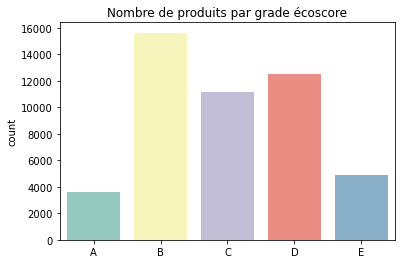

In [18]:
sns.countplot(data=dg,x='ecoscore_grade_fr',palette='Set3',order=['A','B','C','D','E'])
plt.title('Nombre de produits par grade écoscore')
plt.xlabel('')
plt.show()

Sur les grades écoscore présents, on a une majorité de produits de catégorie B. 

Répartition des grades nutriscores

In [19]:
dg['nutriscore_grade'].isna().sum() #Nombre de valeurs nulles pour le nutri-grade

16100

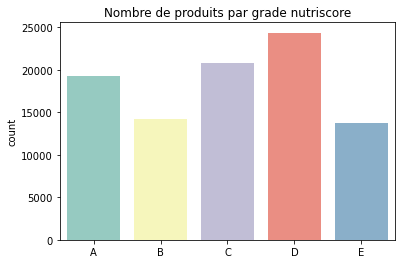

In [20]:
sns.countplot(data=dg,x='nutriscore_grade',palette='Set3',order=['A','B','C','D','E'])
plt.title('Nombre de produits par grade nutriscore')
plt.xlabel('')
plt.show()

Sur les nutri-grades présents, on a une majorité de produits de catégorie D.

Répartition par nova-group

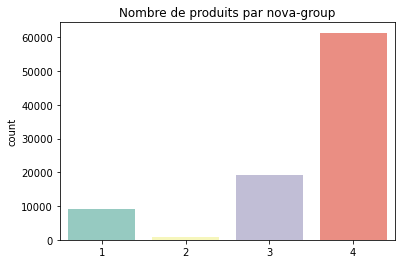

In [21]:
sns.countplot(data=dg,x='nova_group',palette='Set3',order=['1','2','3','4'])
plt.title('Nombre de produits par nova-group')
plt.xlabel('')
plt.show()

#### Distribution de l'énergie 

In [22]:
dg['energy_kcal_100g'].isna().sum() #nombre de valeurs manquantes pour l'énergie.

0

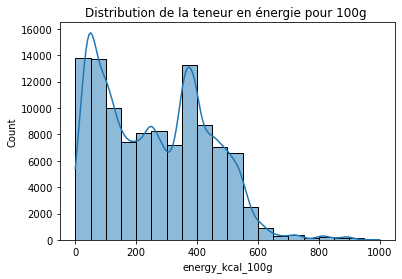

In [23]:
sns.histplot(x=dg['energy_kcal_100g'],binwidth=50,kde=True)
plt.title('Distribution de la teneur en énergie pour 100g ')
plt.show()

In [24]:
dg['energy_kcal_100g'].skew()

0.3647361674058796

On a une distribution bimodale plutôt étalée à droite. On a une forte concentration de produits autour de 50kcal/100g et autour de 350 kcal/100g.

#### Distribution des valeurs nutritionnelles

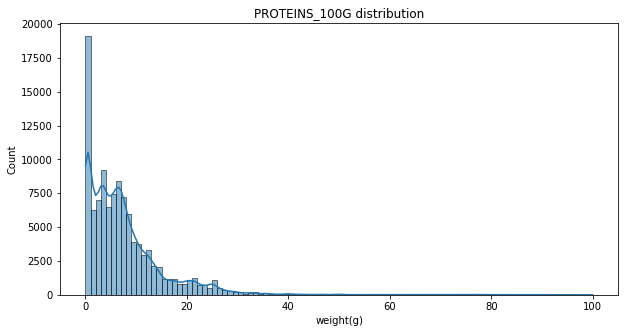

skew : 2.8659739388821115 





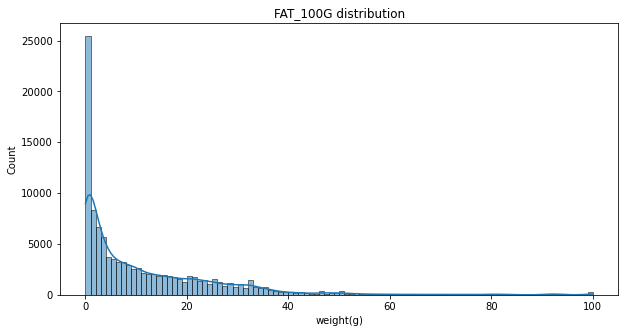

skew : 2.267931085305963 





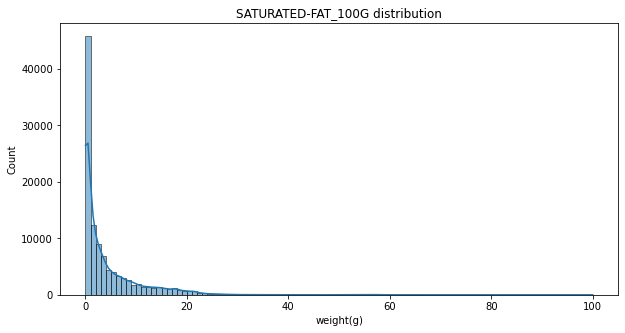

skew : 3.603986305622144 





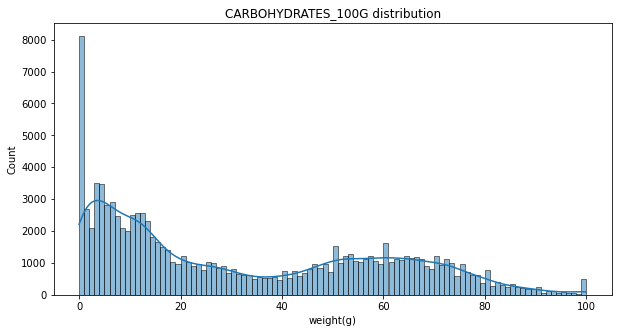

skew : 0.4797222936554939 





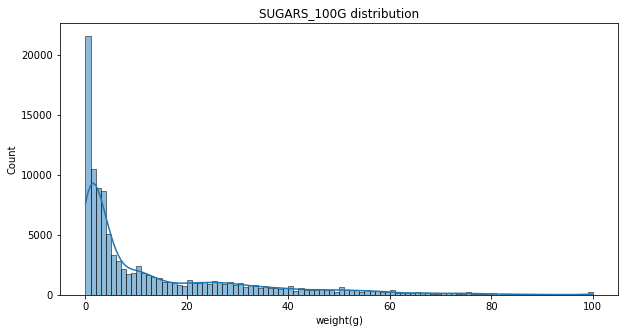

skew : 1.8035956683102512 





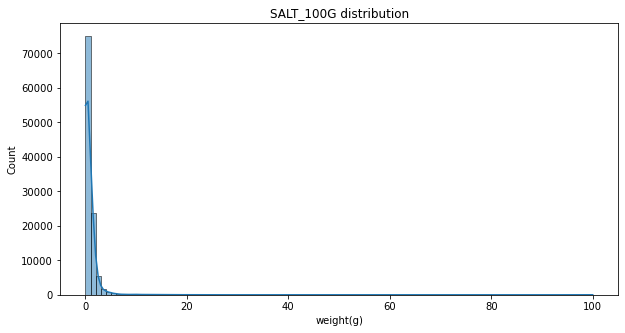

skew : 16.543031352213102 





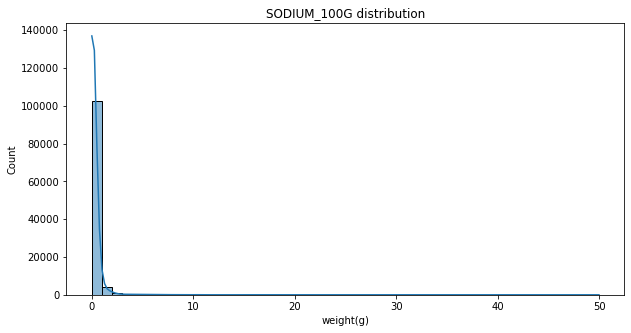

skew : 16.63242979495129 





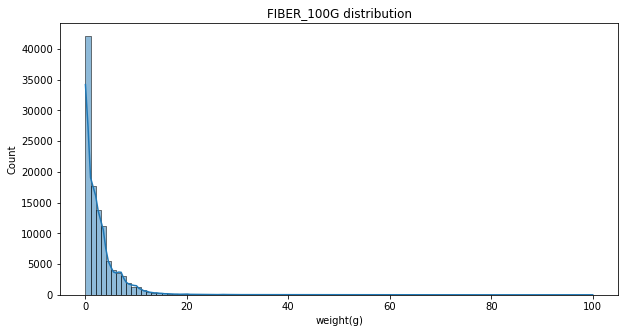

skew : 5.628625221778427 





In [25]:
for c in ['proteins_100g','fat_100g','saturated-fat_100g','carbohydrates_100g', 'sugars_100g','salt_100g','sodium_100g','fiber_100g']:
    plt.figure(figsize=(10,5))
    sns.histplot(x=c,data=dg,binwidth=1,kde=True)
    plt.title(c.upper()+' distribution')
    plt.xlabel('weight(g)')
    plt.show()
    print('skew : {} \n\n\n'.format(dg[c].skew()))

Toutes les distributions sont étalées à droite.Pour chaques valeurs nutritionnelles, (protéines, graisses, glucides, sucres, sels, sodium, fibres) une forte proportion des produits contiennent moins d'1g pour 100g. 

#### Distribution des tailles de portion

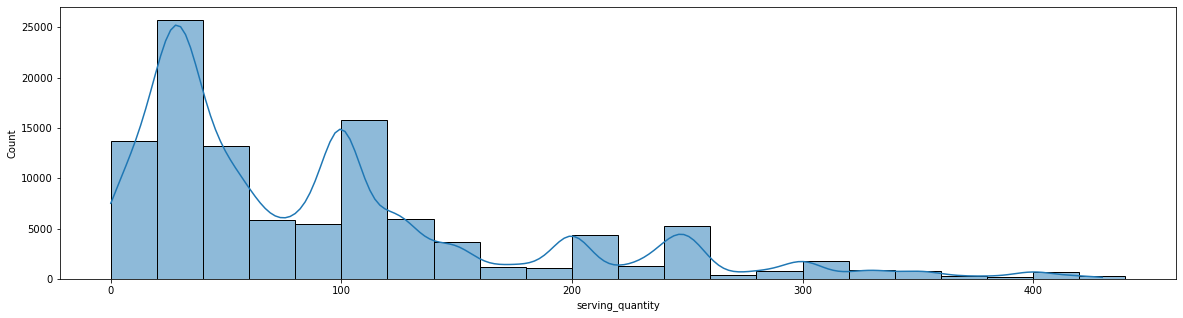

In [26]:
plt.figure(figsize=(20,5))
sns.histplot(data=dg,x='serving_quantity',binwidth=20,kde=True)
plt.show()

On a une forte concentration des tailles de portion autour de 30g et de 100g.

In [27]:
dg.columns

Index(['code', 'url', 'brands_tags', 'product_name', 'additives_n',
       'ingredients_from_palm_oil_n', 'nutriscore_grade', 'nutriscore_score',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'proteins_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'salt_100g', 'sodium_100g', 'serving_quantity', 'labels',
       'ecoscore_grade_fr', 'ecoscore_score_fr', 'energy_kcal_100g',
       'gluten_free'],
      dtype='object')

#### Nombre d'additifs

In [28]:
dg['additives_n'].describe()

count    98122.000000
mean         2.109048
std          2.845962
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         38.000000
Name: additives_n, dtype: float64

C:\Users\celine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


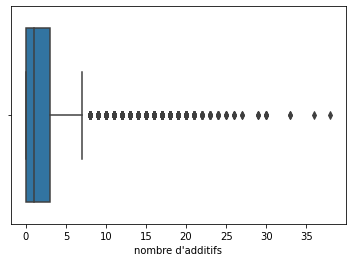

In [29]:
sns.boxplot(dg['additives_n'])
plt.xlabel('nombre d\'additifs')
plt.show()

Les aliments pour lesquels le nombre d'additifs est connu contiennent en majorité moins de 4 additifs. 

In [30]:
dg['additives_n_char']=dg['additives_n'].apply(lambda x:str(x))

In [31]:
dg['additives_n_char'].value_counts()

0.0     37988
1.0     18171
2.0     11679
nan     10530
3.0      8490
4.0      6509
5.0      4478
6.0      3141
7.0      2287
8.0      1639
9.0      1052
10.0      734
11.0      503
12.0      394
13.0      293
14.0      217
15.0      150
16.0      120
17.0       66
18.0       65
19.0       47
20.0       27
21.0       20
22.0       12
23.0       10
24.0        8
30.0        5
25.0        4
26.0        4
29.0        3
27.0        2
33.0        2
36.0        1
38.0        1
Name: additives_n_char, dtype: int64

In [32]:
dg[dg["additives_n_char"]=='nan'][:30]

,code,url,brands_tags,product_name,additives_n,ingredients_from_palm_oil_n,nutriscore_grade,nutriscore_score,nova_group,pnns_groups_1,...,fiber_100g,salt_100g,sodium_100g,serving_quantity,labels,ecoscore_grade_fr,ecoscore_score_fr,energy_kcal_100g,gluten_free,additives_n_char
54953,3375160234020,http://world-en.openfoodfacts.org/product/3375...,les-bons-moment-la-sablaise,"Houmous d'eglefin, pois chiches et tartare d'a...",NaN,NaN,A,-3.0,NaN,Salty snacks,...,4.60,0.230,0.0920,100.0,Organic,B,71.0,224.904398,0,nan
54968,3560070777174,http://world-en.openfoodfacts.org/product/3560...,carrefour,Cheese cake aux fruits rouges 80g.,NaN,NaN,D,14.0,NaN,Sugary snacks,...,1.00,0.200,0.0800,0.0,Fabriqué en France,D,36.0,293.977055,0,nan
54978,3374270040859,http://world-en.openfoodfacts.org/product/3374...,ferme-des-peupliers,Yaourt Citron,NaN,NaN,B,2.0,NaN,Milk and dairy products,...,0.00,0.200,0.0800,125.0,"Nourri sans OGM, Sans OGM, Médaille d'argent d...",B,75.0,91.061185,0,nan
54986,3375220200026,http://world-en.openfoodfacts.org/product/3375...,henri-raffin,Mini Saucissons Secs,NaN,NaN,E,26.0,NaN,Fish Meat Eggs,...,0.20,5.900,2.3600,100.0,"gluten-free, Sans colorants",D,21.0,545.889101,1,nan
55034,3350033214019,http://world-en.openfoodfacts.org/product/3350...,"monoprix-bio,monoprix",Boulgour aux fruits secs,NaN,NaN,B,2.0,NaN,Cereals and potatoes,...,4.00,0.650,0.2600,200.0,"Bio, Bio européen, AB Agriculture Biologique, ...",B,90.0,267.686424,0,nan
55047,3350033338579,http://world-en.openfoodfacts.org/product/3350...,monoprix,Aiguillettes Poulets,NaN,NaN,B,1.0,NaN,Fish Meat Eggs,...,1.10,1.300,0.5200,125.0,"Viande Française, Volaille-francaise",C,53.0,178.059273,0,nan
55064,3350033776432,http://world-en.openfoodfacts.org/product/3350...,"monoprix-bio,monoprix",Chocolat noir et amandes caramélisées Monoprix...,NaN,NaN,B,0.0,NaN,Cereals and potatoes,...,7.80,0.060,0.0240,35.0,Bio,B,70.0,471.080306,0,nan
55071,3350033664043,http://world-en.openfoodfacts.org/product/3350...,monoprix-bio,Chips paysannes,NaN,NaN,C,7.0,NaN,Salty snacks,...,6.00,1.100,0.4400,30.0,Bio,B,63.0,543.021033,0,nan
55083,3560070798599,http://world-en.openfoodfacts.org/product/3560...,carrefour,Apéro Club - crakers et croustillants,NaN,NaN,D,14.0,NaN,Salty snacks,...,2.80,1.600,0.6400,19.0,Fabriqué en France,B,62.0,506.931166,0,nan
55111,3560070823529,http://world-en.openfoodfacts.org/product/3560...,carrefour,Chocolat au Lait céréales croustillantes,NaN,NaN,E,26.0,NaN,Sugary snacks,...,1.90,0.400,0.1600,13.0,Fabriqué en Allemagne,E,8.0,526.529637,0,nan


In [33]:
dg=dg.drop("additives_n_char",axis=1)

#### Nombre d'ingrédients issus de l'huile de palme.

In [34]:
dg['ingredients_from_palm_oil_n'].dtypes

dtype('float64')

In [35]:
dg['ingredients_from_palm_oil_n'].describe()

count    98122.000000
mean         0.038340
std          0.196061
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

Les aliments pout lesquels le nombre d'ingrédients issus de l'huile de palme est connu contiennent en majorité moins de 2 additifs. 

In [36]:
#dg[dg['ingredients_from_palm_oil_n'].isna()][:10]

In [37]:
dg.columns

Index(['code', 'url', 'brands_tags', 'product_name', 'additives_n',
       'ingredients_from_palm_oil_n', 'nutriscore_grade', 'nutriscore_score',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'proteins_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'salt_100g', 'sodium_100g', 'serving_quantity', 'labels',
       'ecoscore_grade_fr', 'ecoscore_score_fr', 'energy_kcal_100g',
       'gluten_free'],
      dtype='object')

#### Aliments contenant le label 'Gluten free'


In [38]:
dg['gluten_free'].value_counts()

0    104462
1      4190
Name: gluten_free, dtype: int64

In [39]:
dg['gluten_free'].value_counts(normalize=True)

0    0.961437
1    0.038563
Name: gluten_free, dtype: float64

Environ 4% des produits du dataset ont le label 'gluten free'.

### Analyses bi-variées.

#### Matrice de covariance des variables quantitative

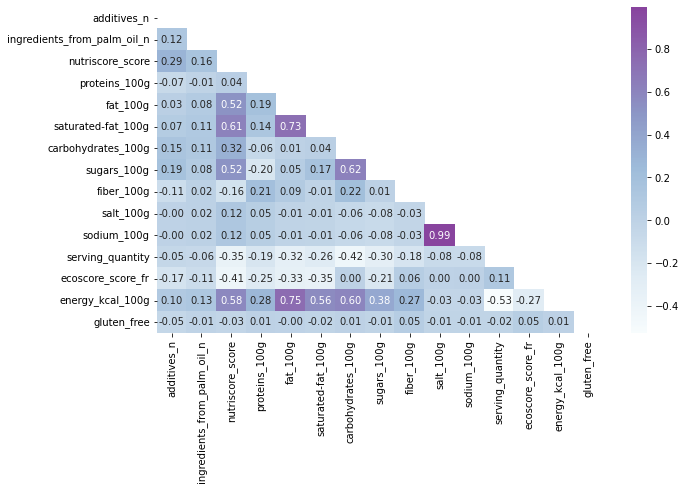

In [40]:
corr=dg.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,  h_pos=240,as_cmap=True)
plt.figure(figsize=(10,6))
sns.heatmap(dg.corr(),mask=mask,center=0.5,cmap="BuPu",annot=True,fmt='.2f')
plt.show()

On a une forte relation linéaire entre les teneurs en sel et en sodium, ainsi qu'entre les teneurs en graisses, graisses saturées et l'énergie. Le nutriscore est fortement corrélé à l'énergie, aux sucres et aux graisses, mais faiblement au sel et aux fibres.  

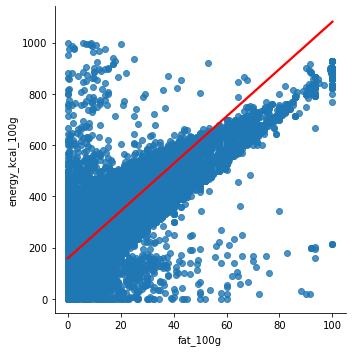

In [41]:
#Exemple: Nuage de point et droite de regression entre la teneur en graisses et l'énergie en kcal.
sns.lmplot(data=dg,x='fat_100g',y='energy_kcal_100g',line_kws={'color': 'red'})
plt.show()

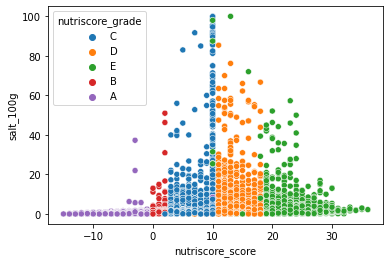

In [42]:
sns.scatterplot(data=dg,x='nutriscore_score',y='salt_100g',hue='nutriscore_grade')
plt.show()

Un faible coefficient de corrélation ne signifie pas aucune relation entre les variables : Le graphique ci-dessus montre que les produits les plus salés ont un nutriscore compris entre 5 et 25 points.

#### Les produits ayant un meilleur nutriscore sont-ils moins transformés? Ont ils un meilleur écoscore ?

In [43]:
#effectifs dans chaque groupes
dk=pd.crosstab(dg['nutriscore_grade'], dg['nova_group'])
dk

nova_group,1,2,3,4
nutriscore_grade,,,,
A,5349,19,4746,6042
B,1231,13,3280,7921
C,1405,196,4577,12353
D,452,191,4605,16944
E,232,155,1597,10616


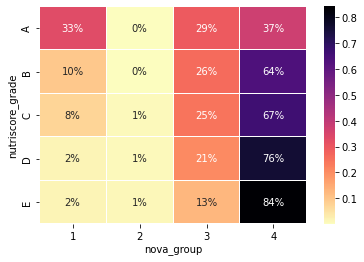

In [44]:
dh=pd.crosstab(dg['nutriscore_grade'], dg['nova_group'],normalize='index')
sns.heatmap(dh,cmap='magma_r',linewidths=0.01,xticklabels=1,annot=True,fmt='.0%')
plt.show()
#La somme de chaque ligne vaut 100%

Lecture : Parmi les produits de nutriscore E, 84% sont ultra-transformés.

Moins le nutriscore est sain, plus la proportion de produits ultra-transformés augmente.

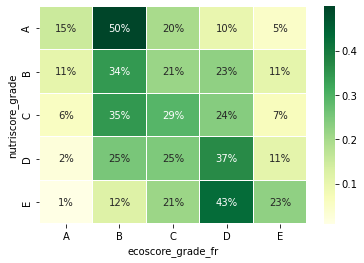

In [45]:
dh=pd.crosstab(dg['nutriscore_grade'], dg['ecoscore_grade_fr'],normalize='index')
sns.heatmap(dh,cmap='YlGn',linewidths=0.01,xticklabels=1,annot=True,fmt='.0%')
#La somme de chaque ligne vaut 100%
plt.show()

Parmi les produits de nutriscore A, 52 % ont un ecoscore B. 
Parmi les produits de catégorie E, 43% ont un écoscore à D.  
La tendance est que moins le nutriscore est sain, plus l'impact environemental des produits augmente.

#### Le nutriscore influence-t-il la taille des portions ?

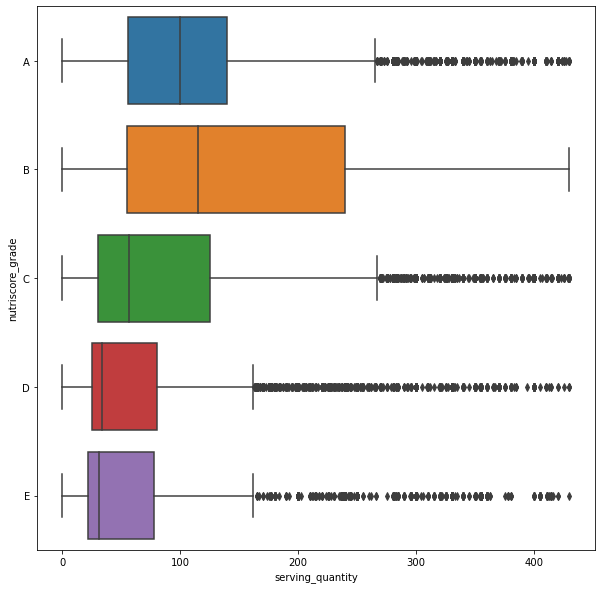

In [46]:
plt.figure(figsize=((10,10)))
sns.boxplot(data=dg,y='nutriscore_grade',x='serving_quantity',order=['A','B','C','D','E'])
plt.show()

Plus le nutriscore est bas, moins les tailles de portions sont dispersées et plus elles sont petites. 

On réalise un test ANOVA pour savoir s'il exite un lien significatif ente le nutriscore et les tailles de portions.  

In [47]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [48]:
anova_variete = smf.ols('serving_quantity~nutriscore_grade', data=dg).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:       serving_quantity   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3122.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:06:18   Log-Likelihood:            -5.3864e+05
No. Observations:               92552   AIC:                         1.077e+06
Df Residuals:                   92547   BIC:                         1.077e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               114.99

In [49]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
nutriscore_grade,8.302562e+07,4.0,3122.415794,0.0
Residual,6.152105e+08,92547.0,NaN,NaN


La p-value vaut 0. On rejette l'hypothèse selon laquelle nutriscore et tailles de portions sont indépendants. 

### Imputation du nutriscore grade

Nous allons imputer la valeur du nutriscore en utilisant les valeurs nutritionnelles (teneurs en protéines, fibres, sel, sucres) à l'aide d'un algortithme de machine learning. 

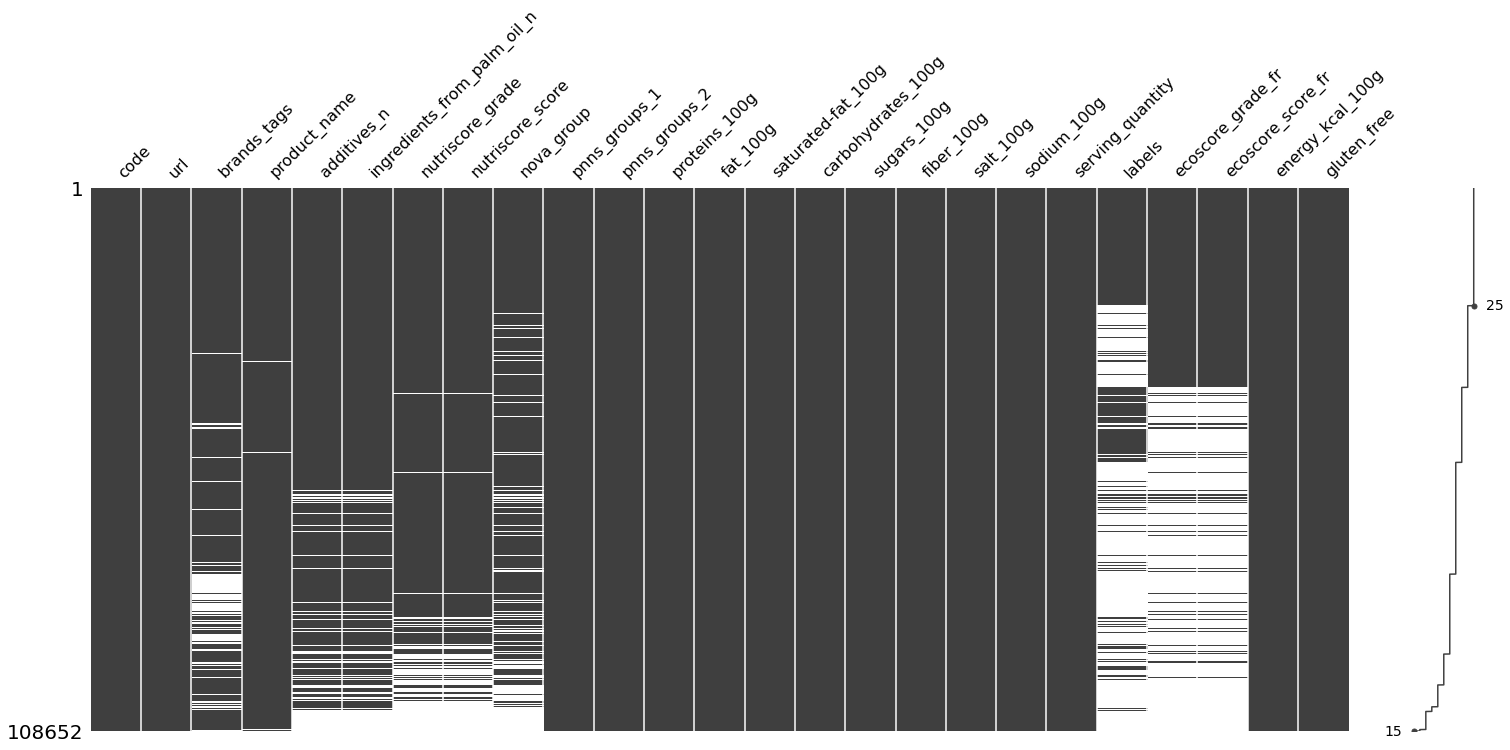

In [50]:
#Valeurs manquantes dans notre dataset
msno.matrix(dg)
plt.show()

On sépare le dataset en deux : dg_model où les nutriscores sont connus et sur lequel nous allons entrainer et tester notre modèle.

In [51]:
dg_init=dg.copy()
dg_model=dg_init.dropna(subset=['nutriscore_grade'])
dg_pred=dg_model[['energy_kcal_100g','proteins_100g','fat_100g','saturated-fat_100g','carbohydrates_100g', 'sugars_100g','salt_100g','fiber_100g']]

In [52]:
X= dg_pred.to_numpy()                                    #X ensemble des variables prédictives
y_text = dg_model['nutriscore_grade'].to_numpy()  # y est la variable à prédire

In [53]:
X

array([[1.26912046e+02, 2.70000000e+00, 4.50000000e+00, ...,
        1.66000000e+01, 1.00000000e-01, 1.00000000e+00],
       [6.47944551e+02, 8.90000000e+00, 6.00000000e+01, ...,
        3.90000000e+00, 0.00000000e+00, 1.40000000e+01],
       [4.18021033e+02, 3.80000000e+00, 2.00000000e+01, ...,
        3.60000000e+01, 5.40000000e-01, 2.80000000e+00],
       ...,
       [5.06931166e+02, 3.11000000e+01, 3.30000000e+01, ...,
        6.00000000e-01, 2.70000000e-01, 3.50000000e+00],
       [5.01912046e+00, 5.00000000e-01, 0.00000000e+00, ...,
        8.00000000e-01, 2.00000000e-02, 5.00000000e-01],
       [4.30927342e+02, 6.00000000e-01, 6.00000000e+00, ...,
        8.50000000e+01, 0.00000000e+00, 9.00000000e-01]])

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 

In [55]:
#Transformation des étiquettes en nombre
le=LabelEncoder()
y = le.fit_transform(y_text)  

In [56]:
dg_model['nutriscore_grade'].value_counts()

D    24380
C    20827
A    19320
B    14225
E    13800
Name: nutriscore_grade, dtype: int64

In [57]:
#On sépare notre jeu de données en jeu d'entrainement et de test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2,random_state=0)

In [58]:
accuracy=[0]
#On entraine notre modèle KNN pour différentes valeurs de k. 
for k in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    yhat_train=clf.predict(X_train)
    yhat_test=clf.predict(X_test)
    a=accuracy_score(yhat_test,y_test)
    accuracy.append(a)
    #On affiche l'accuracy sur le jeu de test si elle est meilleure que celle trouvée à k-1 voisins.  
    if a>accuracy[k-1]:
        print(k,accuracy[k])

            

1 0.7327534979201555
3 0.7172492031764897
5 0.7163848522500135
7 0.7120630976176328
9 0.7117389660202043


Le nombre de bonnes prédictions à l'aide de KNN ne sont pas très satisfaisantes. 

In [59]:
from sklearn.ensemble import RandomForestClassifier 

In [60]:
rnd_clf = RandomForestClassifier(max_depth=20,n_estimators=200)

In [61]:
rnd_clf.fit(X_train,y_train)
yhat_train=rnd_clf.predict(X_train)
yhat_test=rnd_clf.predict(X_test)

In [62]:
accuracy_score(yhat_test,y_test)

0.8923883096537194

L'accuracy obtenue sur le jeu de test avec random forest est satisfaisante. On impute les valeurs du nutri-grade en parcourant chaque ligne du dataframe. 

In [63]:
for i in range(dg.shape[0]):
    if str(dg['nutriscore_grade'][i])=='nan':
        dg.loc[i,'nutriscore_grade']=le.inverse_transform(rnd_clf.predict([[dg['energy_kcal_100g'][i],
                                                       dg['proteins_100g'][i],
                                                       dg['fat_100g'][i],
                                                       dg['saturated-fat_100g'][i],
                                                       dg['carbohydrates_100g'][i],
                                                       dg['sugars_100g'][i],
                                                       dg['salt_100g'][i],
                                                       dg['fiber_100g'][i]],]))
  

In [64]:
dg.nutriscore_grade.isna().sum()

0

In [65]:
dg.nutriscore_grade.value_counts(normalize=True)

D    0.262029
C    0.224589
A    0.212642
B    0.153739
E    0.147001
Name: nutriscore_grade, dtype: float64

In [66]:
dg_init.nutriscore_grade.value_counts(normalize=True)

D    0.263419
C    0.225030
A    0.208748
B    0.153697
E    0.149105
Name: nutriscore_grade, dtype: float64

La distribution du nutri-grade est bien la même qu'avant imputation.

Finalement, on impute les valeurs du nutri-score à l'aide de la moyenne des nutriscores de chaque grade. 

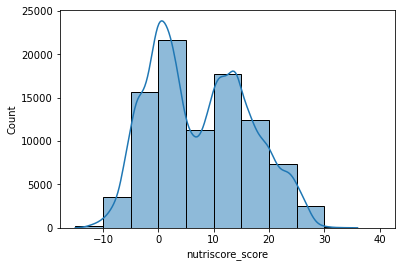

In [67]:
sns.histplot(data=dg,x='nutriscore_score',kde=True,binwidth=5)

In [68]:
dg2=dg.copy()

In [69]:
dg["nutriscore_score"] = dg.groupby("nutriscore_grade")['nutriscore_score'].transform(lambda x: x.fillna(x.mean()))

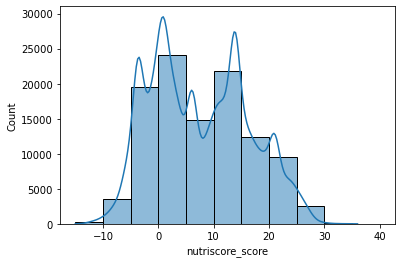

In [70]:
sns.histplot(data=dg,x='nutriscore_score',kde=True,binwidth=5)
plt.show()

On a conservé à peu près la même distribution après imputation du nutriscore.

### Réduction de dimension

In [135]:
data_pca = dg.select_dtypes(include='number')

In [136]:
data_pca = data_pca.fillna(data_pca.mean()) 

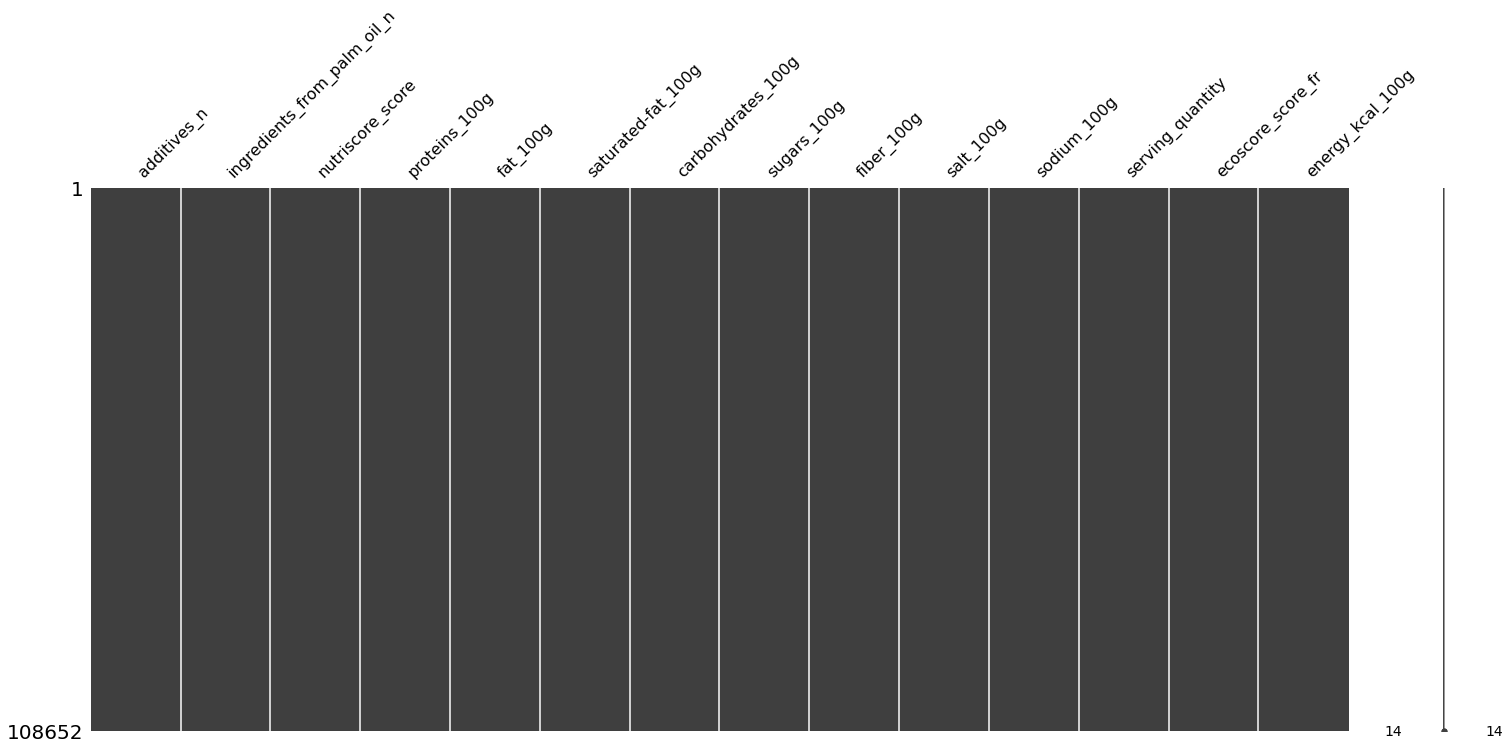

In [137]:
msno.matrix(data_pca)

In [138]:
data_pca.columns

Index(['additives_n', 'ingredients_from_palm_oil_n', 'nutriscore_score',
       'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'salt_100g', 'sodium_100g',
       'serving_quantity', 'ecoscore_score_fr', 'energy_kcal_100g'],
      dtype='object')

In [139]:
#data_pca=data_pca.drop(['sodium_100g'],axis=1)

In [140]:
X = data_pca.values
#names = dg_num.index # ou data.index pour avoir les intitulés
features = ['add_n','palm_oil','nutrsc','prot','fat','s-fat','carbohyd','sugars','fib','salt','sod','serv_qt','ecosc','energy','glutfree']

In [141]:
from sklearn.preprocessing import StandardScaler
#On centre et on réduit les données
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [142]:
#Nombre de composantes principales
n_comp=6

In [143]:
from sklearn import decomposition

In [144]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [145]:
from functions import * 

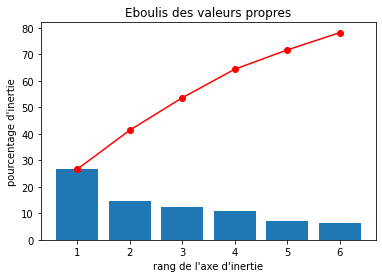

In [146]:
# Eboulis des valeurs propres
display_scree_plot(pca)

In [147]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26616704, 0.41335023, 0.53572014, 0.64347294, 0.71623067,
       0.78147421])

#### Projection sur le premier plan factoriel

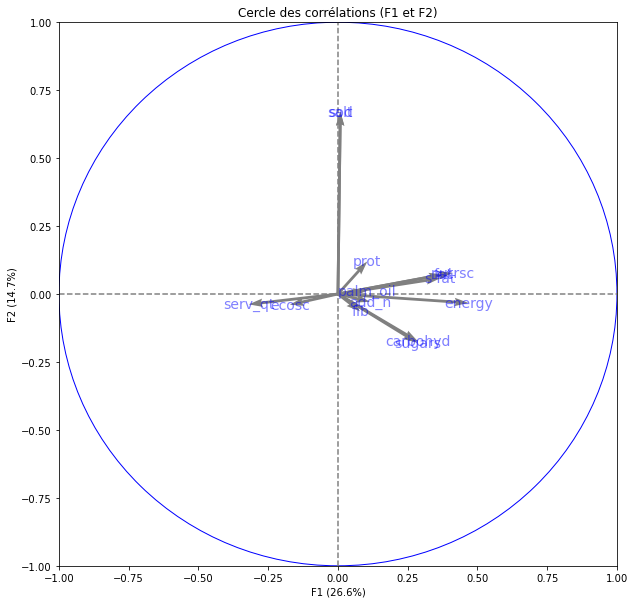

In [148]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


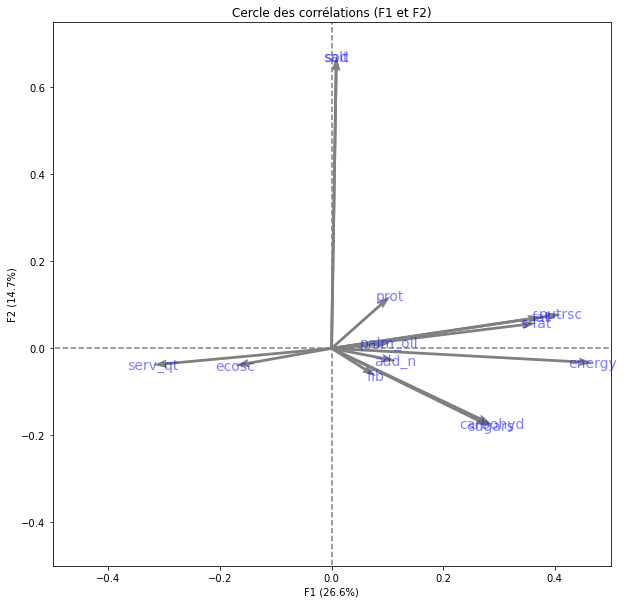

In [149]:
#On zoome
display_circles(pcs, n_comp, pca, [(0,1)],lims=[-0.5,0.5,-0.5, 0.75], labels = np.array(features))

La teneur en sel est très corrélée à F2. 
L'énergie, la nutriscore sont les variables les plus corrélés à F1 et la taille d'une portion est anti-corrélée.Allons voir la projection des individus pour avoir une meilleur idée de ce que représentent F1 et F2. 

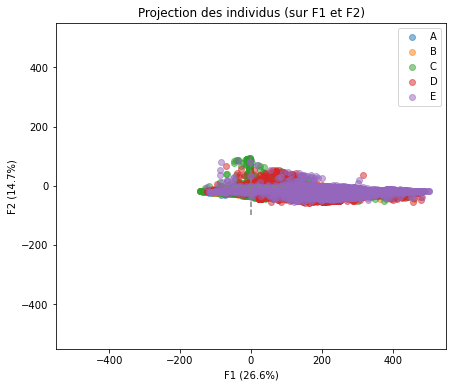

In [154]:
# Projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var=list(dg['nutriscore_grade']))

In [155]:
dX=pd.DataFrame(X_projected,columns=['F1','F2','F3','F4','F5','F6'])

In [156]:
dh=pd.concat([dg,dX],axis=1)

In [157]:
dh

,code,url,brands_tags,product_name,additives_n,ingredients_from_palm_oil_n,nutriscore_grade,nutriscore_score,nova_group,pnns_groups_1,...,ecoscore_grade_fr,ecoscore_score_fr,energy_kcal_100g,gluten_free,F1,F2,F3,F4,F5,F6
0,3177630000247,http://world-en.openfoodfacts.org/product/3177...,mamie-novanovaandros-restauration,Liégeois Chocolat,5.0,0.0,C,4.000000,4,unknown,...,B,62.0,126.912046,False,27.277328,-16.185423,3.615595,7.217450,-19.290038,46.853267
1,3700214616970,http://world-en.openfoodfacts.org/product/3700...,alter-eco,Chocolat noir 95%,0.0,0.0,D,13.000000,3,Sugary snacks,...,D,39.0,647.944551,False,340.888714,-18.163560,-71.609616,126.776709,-49.384246,80.985022
2,3700211234030,http://world-en.openfoodfacts.org/product/3700...,allergo,mini cakes raisins,8.0,0.0,D,14.000000,4,Sugary snacks,...,C,49.0,418.021033,True,216.198766,-30.186188,9.814100,86.354221,-34.841860,52.446338
3,3700211234054,http://world-en.openfoodfacts.org/product/3700...,"allergo,gerble",Mini Cakes Marbrés Gerblé,7.0,1.0,D,18.000000,4,Sugary snacks,...,D,38.0,441.682600,True,234.460120,-29.138193,5.615136,88.344812,-33.251590,48.373962
4,3700212514247,http://world-en.openfoodfacts.org/product/3700...,"sans-marque,amand-bianic",Andouillettes barbecue nature (3+1 gratuite),2.0,0.0,D,14.000000,4,Fish Meat Eggs,...,E,-4.0,226.816444,False,84.371431,-6.244886,-42.143660,3.690395,-0.470062,15.356444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108647,7613312131688,http://world-en.openfoodfacts.org/product/7613...,NaN,NaN,NaN,NaN,D,13.852543,NaN,unknown,...,NaN,NaN,505.019120,False,261.782311,-28.427655,-10.417037,111.019490,-40.348601,63.284423
108648,5414955200128,http://world-en.openfoodfacts.org/product/5414...,NaN,NaN,NaN,NaN,C,6.129976,NaN,unknown,...,NaN,NaN,37.045889,False,3.618475,6.630622,-30.412066,27.893672,10.386354,4.324341
108649,5948710012386,http://world-en.openfoodfacts.org/product/5948...,NaN,NaN,NaN,NaN,D,13.852543,NaN,unknown,...,NaN,NaN,423.040153,False,109.192672,-35.241144,-32.121181,11.078126,-11.048603,64.598311
108650,4260363480031,http://world-en.openfoodfacts.org/product/4260...,NaN,NaN,NaN,NaN,B,0.883234,NaN,unknown,...,NaN,NaN,374.521989,False,172.252017,-6.909445,-48.223941,101.898864,-7.683191,28.032652


In [158]:
#Noms des produits qui ont la plus grande projection sur F1. 
dh[['product_name','F1']].sort_values(by=['F1'],ascending=False).head(50)

,product_name,F1
85150,Coconut Oil,501.001149
85149,Unrefined Coconut Oil,501.001149
37822,Ghee,498.262541
66875,Aceite De Coco Virgen extra,491.728691
98855,Ulei de Cocoa Bio,490.887730
61775,Kokosolie,488.437736
62172,Ayurveda Ghee (230G),484.587977
22038,Pure Ghee,484.246959
40826,ACEITE DE COCO EXTRA VIRGEN,484.177634
81037,Melrose MCT,484.070555


Il s'agit d'huiles, de beurres et de produits très gras.

In [159]:
#Nom des produits qui ont la plus grande projection sur F2
dh[['product_name','F2']].sort_values(by=['F2'],ascending=False).head(50)

,product_name,F2
83633,Himalayan Pink Salt,92.551397
92266,Sal Yodada Fluorurada,92.455710
90356,Basic Zout,92.172459
81175,Iodized salt,91.358862
93139,Bad Reichenhaller Alpen JodSalz,91.195130
62753,JODSALZ,91.101252
40192,Jodsalz mit Fluorid,91.072623
60583,Jodsalz mit Fluorid,91.072623
60864,Jodsalz,91.072623
41460,Sal Yodada Fluorurada,90.942066


On trouve les sels. 

#### Projection sur le second plan factoriel

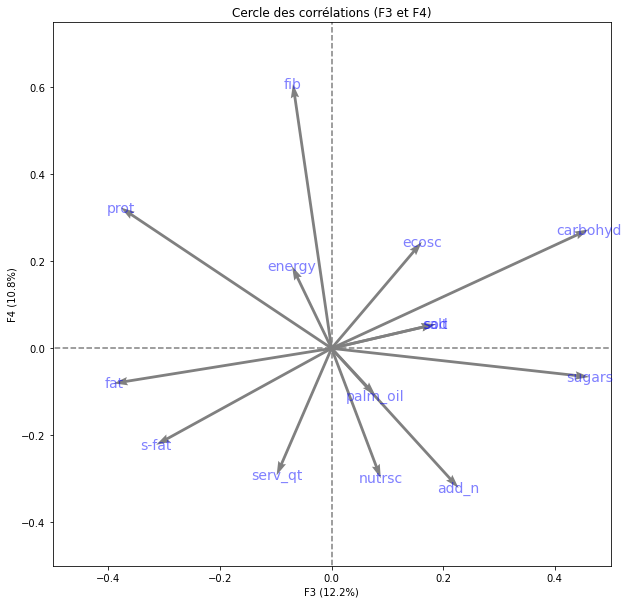

In [160]:
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features),lims=[-0.5,0.5,-0.5, 0.75])

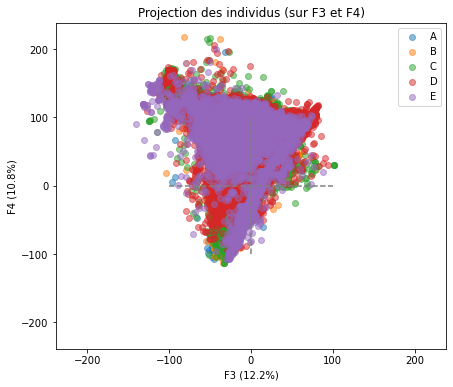

In [161]:
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)],illustrative_var=list(dg['nutriscore_grade']))

Les teneurs en glucides et sucres sont les plus corrélés à F3. Les teneurs en fibres sont très corrélés à F4.

In [164]:
#Nom des produits qui ont la plus grande projection sur F3
dh[['product_name','F3']].sort_values(by=['F3'],ascending=False).head(5)

,product_name,F3
87253,Total sweet,101.409602
95733,Splenda endulzante Original,101.295905
95731,Splenda,101.295905
95730,Splenda,101.295905
90426,Pez,93.806600


sucres

In [166]:
#Nom des produits qui ont la plus grande projection sur F4
dh[['product_name','F4']].sort_values(by=['F4'],ascending=False).head(30)

,product_name,F4
101185,"Ths Super Tea, Organic White Tea",216.966996
68949,OptíFibre,216.565174
107037,Optifibre,215.113896
30842,24 wheat biscuits,214.626436
96965,Téguments de graines de psyllium,210.874544
81349,Tortilla pockets,205.961148
100332,Cinnamon Crumble Muffin Mix,200.223707
64977,White Sliced Bread 800G,199.541145
29185,Deliciosas,196.919593
51329,Spice mix for Lahori Fish,196.216147


Nous trouvons bien des aliments riches en fibres. 

### Analyses sur les produits labelisés sans Gluten

#### Répartition par catégories

In [95]:
dg['gluten_free'].value_counts()

0    104462
1      4190
Name: gluten_free, dtype: int64

In [96]:
dg['gluten_free']=dg['gluten_free'].apply(lambda x:bool(x))

In [97]:
dnoglu=dg[dg['gluten_free']==True]

In [98]:
dnoglu.shape

(4190, 25)

In [99]:
100*dnoglu.shape[0]/dg.shape[0]

3.856348709641792

Les produits avec un label sans gluten représentent 4% du dataset total.

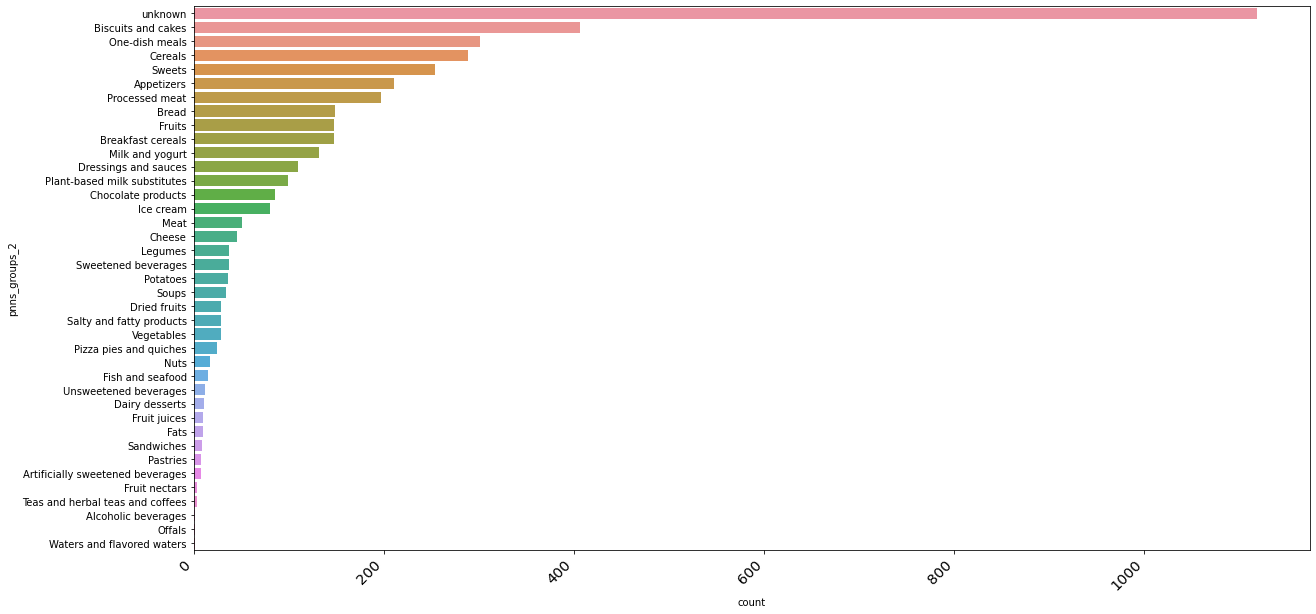

In [100]:
plt.figure(figsize=(20,10))
sns.countplot(data=dnoglu,y='pnns_groups_2',order=dnoglu['pnns_groups_2'].value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large'  )
plt.show()

In [101]:
dnoglu[dnoglu['pnns_groups_2']=='unknown'].shape[0]/dnoglu.shape[0]

0.2668257756563246

En proportion il y a autant de catégories unknown dans les produits sans gluten que dans l'ensemble du dataset. 

#### Analyses sur la catégorie "biscuits and cakes"

##### Comparaisons sur le nutriscore

In [102]:
#On filtre le dataset sur la catégorie biscuits and cakes
dg_biscuits=dg[dg['pnns_groups_2']=='Biscuits and cakes']
dg_biscuits_noglu=dnoglu[dnoglu['pnns_groups_2']=='Biscuits and cakes']

On s'interesse à la répartition par nutriscore de la catégorie "biscuits and cakes", avec et sans le label sans gluten. 

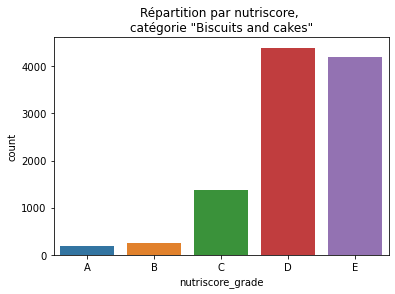

In [103]:
# Répartition du nutriscore pour l'ensemble de la catégorie "biscuits and cakes"
sns.countplot(data=dg_biscuits,x='nutriscore_grade',order=['A','B','C','D','E'])
plt.title('Répartition par nutriscore, \ncatégorie "Biscuits and cakes"')
plt.show()

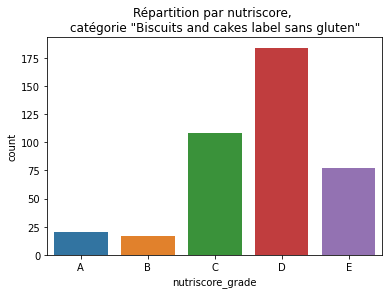

In [104]:
sns.countplot(data=dg_biscuits_noglu,x='nutriscore_grade',order=['A','B','C','D','E'])
plt.title('Répartition par nutriscore, \ncatégorie "Biscuits and cakes label sans gluten"')
plt.show()

Observons cette répartition en termes de proportions.

In [105]:
a=round(dg_biscuits['nutriscore_grade'].value_counts(normalize=True)*100,2)
b=round(dg_biscuits_noglu['nutriscore_grade'].value_counts(normalize=True)*100,2)
a.sort_index(inplace=True)
b.sort_index(inplace=True)

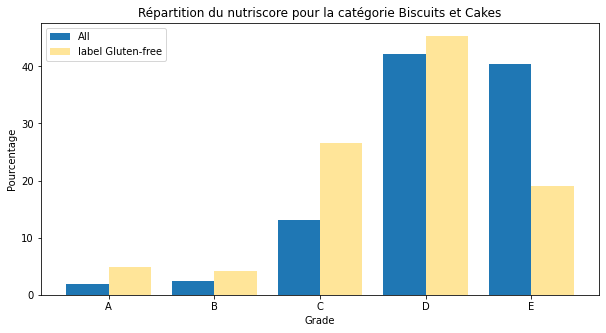

In [106]:
plt.figure(figsize=(10,5))
w=0.4
x=['A','B','C','D','E']
all_products=list(a)
without_gluten=list(b)
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,all_products,w,label="All")
plt.bar(bar2,without_gluten,w,label="label Gluten-free",color='#ffe599')
plt.xlabel('Grade')
plt.ylabel('Pourcentage')
plt.xticks(bar1+w/2,x)
plt.title('Répartition du nutriscore pour la catégorie Biscuits et Cakes')
plt.legend(loc=2)
plt.show()

20% des biscuits labelisés Gluten free sont de catégorie E, tandis que 40% de l'ensemble des biscuits sont de catégorie E. Aussi en proportion davantage de biscuits gluten free ont un meilleur nutri-score. 

##### Comparaisons sur l'écoscore

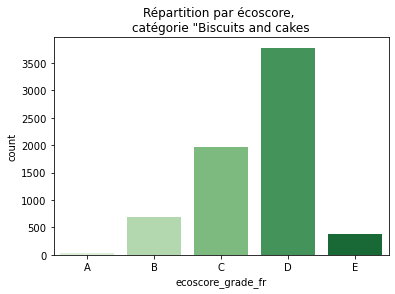

In [184]:
sns.countplot(data=dg_biscuits,x='ecoscore_grade_fr',order=['A','B','C','D','E'],palette="Greens")
plt.title('Répartition par écoscore, \ncatégorie "Biscuits and cakes')
plt.show()

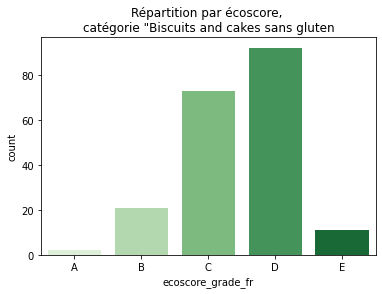

In [183]:
sns.countplot(data=dg_biscuits_noglu,x='ecoscore_grade_fr',order=['A','B','C','D','E'],palette="Greens")
plt.title('Répartition par écoscore, \ncatégorie "Biscuits and cakes sans gluten')
plt.show()

On constate qu'en proportion on a davantage de produits labelisés sans gluten d'écoscore C mais les répartitions semblent plus ou moins similaires. On réalise un test d'indépendance du chi-2 entre l'absence de gluten et l'écoscore. On considère l'hypothèse H0 "Parmi les produits de la catégorie "Biscuits and Cakes", le label gluten-free et l'écoscore sont indépendants. 

In [109]:
from scipy.stats import chi2_contingency, chi2

In [167]:
dh=pd.crosstab(dg_biscuits['gluten_free'],dg_biscuits['ecoscore_grade_fr'])
dh

ecoscore_grade_fr,A,B,C,D,E
gluten_free,,,,,
False,37,668,1902,3684,370
True,2,21,73,92,11


In [111]:
chi2_contingency(dh)[1] 

0.08916072974777293

p-value>0.05. Au seuil de 5% on accepte l'hypothèse H0.

In [173]:
dk=pd.crosstab(dg_biscuits['gluten_free'],dg_biscuits['ecoscore_grade_fr'],normalize='index')

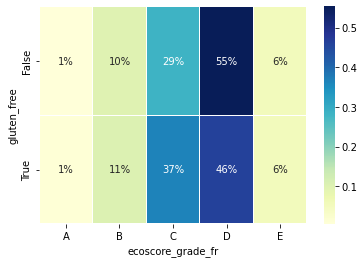

In [175]:
sns.heatmap(dk,cmap="YlGnBu",linewidths=0.01,xticklabels=1,annot=True,fmt='.0%')
plt.show()

##### Comparaisons sur le nova-group

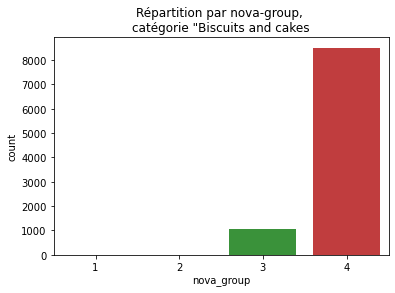

In [112]:
sns.countplot(data=dg_biscuits,x='nova_group',order=['1','2','3','4'])
plt.title('Répartition par nova-group, \ncatégorie "Biscuits and cakes')
plt.show()

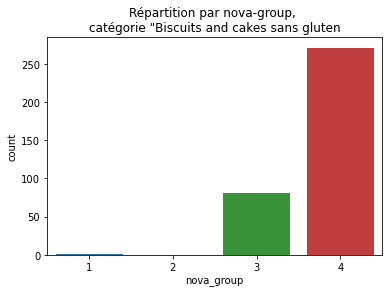

In [113]:
sns.countplot(data=dg_biscuits_noglu,x='nova_group',order=['1','2','3','4'])
plt.title('Répartition par nova-group, \ncatégorie "Biscuits and cakes sans gluten')
plt.show()

On constate que la répartition est à peu près la même. Nous décidons de réaliser un test d'indépendance du chi-2 pour savoir si l'absence de gluten impacte le nova-group. On considère H0 l'hypothèse "Parmi les produits de la catégorie "biscuits and cakes", le label gluten-free et le nova group sont indépendants"

In [114]:
dh=pd.crosstab(dg_biscuits['gluten_free'],dg_biscuits['nutriscore_grade'])
dh

nutriscore_grade,A,B,C,D,E
gluten_free,,,,,
False,170,242,1259,4208,4122
True,20,17,108,184,77


In [115]:
chi2_contingency(dh)[1] 

4.664384162760653e-28

La p-valeur est bien inférieure à 0.05. On rejette donc l'hypothèse H0. Il y a donc un lien significatif entre le nova-group et l'absence de gluten. 

In [181]:
dk=pd.crosstab(dg_biscuits['gluten_free'],dg_biscuits['nova_group'],normalize='index')

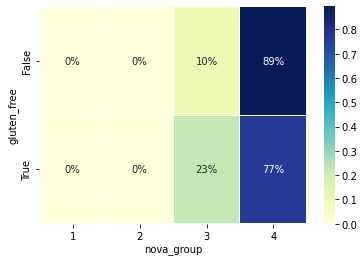

In [182]:
sns.heatmap(dk,cmap="YlGnBu",linewidths=0.01,xticklabels=1,annot=True,fmt='.0%')
plt.show()

##### Absence de gluten et tailles de portions.

On réalise un test ANOVA pour savoir si l'absence de gluten et les tailles de portions sont indépendantes parmi la catégorie biscuits. 

In [116]:
anova_variete = smf.ols('serving_quantity~gluten_free', data=dg_biscuits).fit()
print(anova_variete.summary())



                            OLS Regression Results                            
Dep. Variable:       serving_quantity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           0.000895
Time:                        09:19:34   Log-Likelihood:                -51778.
No. Observations:               10407   AIC:                         1.036e+05
Df Residuals:                   10405   BIC:                         1.036e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.3194    

La p-value vaut 0.000895 qui est bien inférieure à 0.005. On rejette l'hypothèse H0. Le label gluten free a bien une influence sur la taille de portion de la catégorie biscuits and cakes. On décide cependant de faire le test sur une catégorie plus fine: les cookies.

In [117]:
d_cookie=dg_biscuits[(dg_biscuits['product_name'].str.contains('cookie',case=False,na=False)==True)]

In [118]:
anova_variete = smf.ols('serving_quantity~gluten_free', data=d_cookie).fit()
print(anova_variete.summary())


                            OLS Regression Results                            
Dep. Variable:       serving_quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2392
Date:                Mon, 27 Sep 2021   Prob (F-statistic):              0.625
Time:                        09:19:34   Log-Likelihood:                -5802.4
No. Observations:                1289   AIC:                         1.161e+04
Df Residuals:                    1287   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              38.0902    

La valeur de la p-value vaut 0.625>0.05. On accepte l'hypothèse H0 au seuil de 5%. La présence du label gluten-free n'influe pas sur la taille de portions des cookies. 

#### Comparaisons des valeurs nutritionnelles

In [119]:
liste=['proteins_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g','salt_100g']

In [120]:
import plotly.graph_objects as go
import plotly.offline as pyo

def teneurs_glfree(c,words,titre): 
    
    ''' c est le nom d'une colonne
        words est une liste de chaines de caractères
        La fonction représente les valeurs nutritionnelles moyennes des produits
        contenant l\'ensemble de mots words dans la colonne c avec et sans le label gluten-free'''
    if len(words)==1:
        dnoglu_w=dnoglu[(dnoglu[c].str.contains(words[0],case=False,na=False)==True)]
        d_w=dg[(dg[c].str.contains(words[0],case=False,na=False)==True)&(dg.gluten_free==False)]
    elif len(words)==2:
        dnoglu_w=dnoglu[(dnoglu[c].str.contains(words[0],case=False,na=False)==True)&\
                        (dnoglu[c].str.contains(words[1],case=False,na=False)==True)]
        d_w=dg[(dg[c].str.contains(words[0],case=False,na=False)==True)&(dg.gluten_free==False)]
    
    categories = liste
    categories = [*categories, categories[0]]
        
    r_1 = list(dnoglu_w[liste].mean())
    r_2 = list(d_w[liste].mean())

    r_1 = [*r_1, r_1[0]]
    r_2 = [*r_2, r_2[0]]

    fig = go.Figure(
        data=[
            go.Scatterpolar(r=r_1, theta=categories, name='mention gluten-free'),
            go.Scatterpolar(r=r_2, theta=categories, name='sans mention gluten-free')
        ],
        layout=go.Layout(
            title=go.layout.Title(text='Teneurs moyennes pour 100 g: {}'.format(titre)),
            polar={'radialaxis': {'visible': True}},
            showlegend=True
        )
    )

    pyo.plot(fig)
    

In [188]:
#Teneurs nutritionnelles moyennes des plats préparés
teneurs_glfree('pnns_groups_2',['meal'],'plats préparés')

Les plats préparés portant la mention gluten-free sont en moyenne plus riches en glucides et sucres, en graisses non saturées et en protéines. 

In [122]:
#Teneurs nutritionnelles moyennes des pâtes
teneurs_glfree('product_name',['pâte'],'')

Les pâtes (plus précisemment les produits dont le nom contient "pâte") portant la mention gluten-free semblent plus saines: elles contiennent en moyenne plus de glucides et de protéines, moins de sucres et de graisses. Attention 

In [186]:
#Teneurs nutritionnelles moyennes des pains de mie
teneurs_glfree('product_name',['pain','mie'],'pain de mie')

Le pain de mie gluten-free est moins riche sur toutes les valeurs nutrionnelles.

In [124]:
teneurs_glfree('product_name',['chips'],'chips')

Les chips gluten-free contiennent en moyenne un peu moins de graisses et de sucres

In [187]:
teneurs_glfree('product_name',['cookie'],'cookies')